# VRP with 2-stage approach

In [1]:
from edge_model import EdgeTrainer
from util import *

In [2]:
# load the autoreload extension
%load_ext autoreload
# set the level of reloading
%autoreload 2

## Parse data

In [3]:
all_vrp_instances = [parse_datafile(f'../data/cvrp_1000_10_5_1/instance_{i}') for i in range(1000)]

Parsing datafile: ../data/cvrp_1000_10_5_1/instance_0...
Parsing datafile: ../data/cvrp_1000_10_5_1/instance_1...
Parsing datafile: ../data/cvrp_1000_10_5_1/instance_2...
Parsing datafile: ../data/cvrp_1000_10_5_1/instance_3...
Parsing datafile: ../data/cvrp_1000_10_5_1/instance_4...
Parsing datafile: ../data/cvrp_1000_10_5_1/instance_5...
Parsing datafile: ../data/cvrp_1000_10_5_1/instance_6...
Parsing datafile: ../data/cvrp_1000_10_5_1/instance_7...
Parsing datafile: ../data/cvrp_1000_10_5_1/instance_8...
Parsing datafile: ../data/cvrp_1000_10_5_1/instance_9...
Parsing datafile: ../data/cvrp_1000_10_5_1/instance_10...
Parsing datafile: ../data/cvrp_1000_10_5_1/instance_11...
Parsing datafile: ../data/cvrp_1000_10_5_1/instance_12...
Parsing datafile: ../data/cvrp_1000_10_5_1/instance_13...
Parsing datafile: ../data/cvrp_1000_10_5_1/instance_14...
Parsing datafile: ../data/cvrp_1000_10_5_1/instance_15...
Parsing datafile: ../data/cvrp_1000_10_5_1/instance_16...
Parsing datafile: ../dat

## Train model

In [4]:
vrp_instances_train = all_vrp_instances[:800]
vrp_instances_test = all_vrp_instances[800:]

trainer = EdgeTrainer(vrp_instances_train, vrp_instances_test, lr=8e-5)
trainer.train()

Epoch 0: Train Loss: 0.2858657967613803 | Test Loss: 0.18100176826384098
Epoch 1: Train Loss: 0.13939356154203414 | Test Loss: 0.10264934817755836
Epoch 2: Train Loss: 0.08689303895168835 | Test Loss: 0.07175997843830242
Epoch 3: Train Loss: 0.06536583012839159 | Test Loss: 0.05800977076335974
Epoch 4: Train Loss: 0.054783764482372335 | Test Loss: 0.05082742317346443
Epoch 5: Train Loss: 0.049541070437265765 | Test Loss: 0.04775306648950276
Epoch 6: Train Loss: 0.04739390495833423 | Test Loss: 0.04668094606517581
Epoch 7: Train Loss: 0.0466860688270794 | Test Loss: 0.04637106505039001
Epoch 8: Train Loss: 0.04648520514617364 | Test Loss: 0.04632093693207466
Epoch 9: Train Loss: 0.04642527326527569 | Test Loss: 0.0463529304894048
Epoch 10: Train Loss: 0.046406157775885526 | Test Loss: 0.0463187826688188
Epoch 11: Train Loss: 0.04640497187193897 | Test Loss: 0.04634250106280058
Epoch 12: Train Loss: 0.046407664855321246 | Test Loss: 0.04629705554837126
Epoch 13: Train Loss: 0.04640522035

## Test model

Testing example instance VRP instance: ../data/cvrp_1000_10_5_1/instance_800, predicted cost: 0.4499720633029938, actual cost: 0.3636530067029978
Drawing actual solution


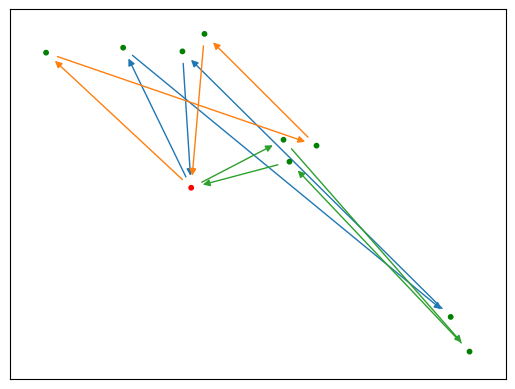

Drawing predicted solution


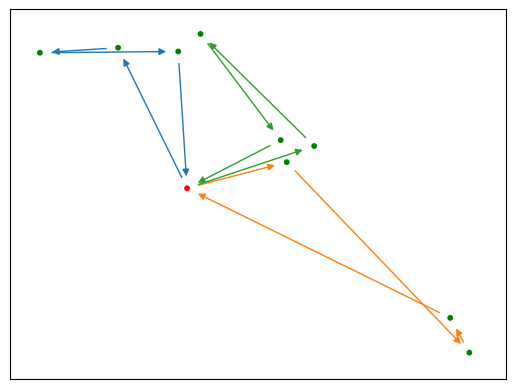

Actual edges (12): [0 -> 3, 0 -> 6, 0 -> 7, 1 -> 0, 2 -> 4, 3 -> 2, 4 -> 0, 5 -> 8, 6 -> 9, 7 -> 5, 8 -> 0, 9 -> 1]
Predicted edges (12): [0 -> 3, 0 -> 8, 0 -> 9, 1 -> 7, 2 -> 0, 3 -> 6, 4 -> 0, 5 -> 2, 6 -> 4, 7 -> 0, 8 -> 5, 9 -> 1]
Correct edges (3): {4 -> 0, 9 -> 1, 0 -> 3}


In [6]:
test_and_draw(trainer, vrp_instances_test[0])

In [9]:
for vrp in all_vrp_instances:
    solver = GurobiSolver(vrp)
    solver.solve()
    vrp.actual_solution = solver.get_decision_variables()
    vrp.actual_obj = solver.get_actual_objective()

In [10]:
test(trainer, vrp_instances_test, GurobiSolver)

Parsed instance VRP instance: ../data/cvrp_1000_10_5_1/instance_800, accuracy: 0.25, actual cost: 2.519613882754333, predicted cost: 5.4869719009568305
Parsed instance VRP instance: ../data/cvrp_1000_10_5_1/instance_801, accuracy: 0.65, actual cost: 3.8246332902372933, predicted cost: 8.977703480469625
Parsed instance VRP instance: ../data/cvrp_1000_10_5_1/instance_802, accuracy: 1.0136363636363637, actual cost: 5.902370928306482, predicted cost: 13.108689555176028
Parsed instance VRP instance: ../data/cvrp_1000_10_5_1/instance_803, accuracy: 1.1803030303030304, actual cost: 7.890158722013935, predicted cost: 16.7568308322281
Parsed instance VRP instance: ../data/cvrp_1000_10_5_1/instance_804, accuracy: 1.1803030303030304, actual cost: 10.112707085393044, predicted cost: 21.698783120348516
Parsed instance VRP instance: ../data/cvrp_1000_10_5_1/instance_805, accuracy: 1.4879953379953381, actual cost: 12.879361423575611, predicted cost: 25.485052345048906
Parsed instance VRP instance: ..